# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# url= f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}"
# city_url = url + "&q=" + cities[0]
# print(city_url)

In [3]:

url= f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}"
# List of city data
city_data =[]
print("Beginning Data Retrieval           ")
print("----"*10)
set_count=1
record_count=1

for city in cities:
    city_url = url + "&q=" + city
    if record_count >50:
        record_count=1
        set_count +=1
    print(f"Processing Record {record_count} of {set_count} | {city}")
    record_count+=1
    
    try:
        city_request=requests.get(city_url).json()
        #pprint(city_request)
        #parse out data
        city_lat=city_request["coord"]["lat"]
        city_lng=city_request["coord"]["lon"]
        city_max_temp = city_request["main"]["temp_max"]
        city_humidity = city_request["main"]["humidity"]
        city_clouds = city_request["clouds"]["all"]
        city_wind = city_request["wind"]["speed"]
        city_country = city_request["sys"]["country"]
        city_date=city_request["dt"]
        # append information into citi_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp":  city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date     
        })
    except:
        print("City not found. skipping...")
        pass
    #Indicate data loading is complete
print("----"*10)
print("Data Retrieval Complete")
print("----"*10)

Beginning Data Retrieval           
----------------------------------------
Processing Record 1 of 1 | albany
Processing Record 2 of 1 | bluff
Processing Record 3 of 1 | mount gambier
Processing Record 4 of 1 | rikitea
Processing Record 5 of 1 | antofagasta
Processing Record 6 of 1 | castro
Processing Record 7 of 1 | jamestown
Processing Record 8 of 1 | kaitangata
Processing Record 9 of 1 | qinhuangdao
Processing Record 10 of 1 | qaanaaq
Processing Record 11 of 1 | kushiro
Processing Record 12 of 1 | negotino-polosko
City not found. skipping...
Processing Record 13 of 1 | kaya
Processing Record 14 of 1 | gelemso
Processing Record 15 of 1 | atuona
Processing Record 16 of 1 | punta arenas
Processing Record 17 of 1 | thompson
Processing Record 18 of 1 | saint-leu
Processing Record 19 of 1 | avarua
Processing Record 20 of 1 | airai
Processing Record 21 of 1 | georgetown
Processing Record 22 of 1 | vaini
Processing Record 23 of 1 | cherskiy
Processing Record 24 of 1 | indramayu
Processing 

City not found. skipping...
Processing Record 8 of 5 | necochea
Processing Record 9 of 5 | constantine
Processing Record 10 of 5 | tuktoyaktuk
Processing Record 11 of 5 | honningsvag
Processing Record 12 of 5 | dakar
Processing Record 13 of 5 | luderitz
Processing Record 14 of 5 | mirante do paranapanema
Processing Record 15 of 5 | tumannyy
City not found. skipping...
Processing Record 16 of 5 | san quintin
Processing Record 17 of 5 | flinders
Processing Record 18 of 5 | puerto del rosario
Processing Record 19 of 5 | erenhot
Processing Record 20 of 5 | meulaboh
Processing Record 21 of 5 | cayenne
Processing Record 22 of 5 | battle creek
Processing Record 23 of 5 | pacific grove
Processing Record 24 of 5 | bud
Processing Record 25 of 5 | klaksvik
Processing Record 26 of 5 | shadrinsk
Processing Record 27 of 5 | eureka
Processing Record 28 of 5 | bredasdorp
Processing Record 29 of 5 | atar
Processing Record 30 of 5 | solwezi
Processing Record 31 of 5 | riberalta
Processing Record 32 of 5

Processing Record 21 of 9 | bose
Processing Record 22 of 9 | montepuez
Processing Record 23 of 9 | kamenskoye
City not found. skipping...
Processing Record 24 of 9 | mabaruma
Processing Record 25 of 9 | esperance
Processing Record 26 of 9 | shubarkuduk
Processing Record 27 of 9 | nizwa
Processing Record 28 of 9 | riacho de santana
Processing Record 29 of 9 | meyungs
City not found. skipping...
Processing Record 30 of 9 | la rioja
Processing Record 31 of 9 | wairoa
Processing Record 32 of 9 | mildura
Processing Record 33 of 9 | wamba
Processing Record 34 of 9 | mentok
City not found. skipping...
Processing Record 35 of 9 | la asuncion
Processing Record 36 of 9 | koshurnikovo
Processing Record 37 of 9 | umm kaddadah
Processing Record 38 of 9 | spassk-ryazanskiy
Processing Record 39 of 9 | ambilobe
Processing Record 40 of 9 | axim
Processing Record 41 of 9 | chapais
Processing Record 42 of 9 | grindavik
Processing Record 43 of 9 | mitsamiouli
Processing Record 44 of 9 | cacaotepec
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_data_df = pd.DataFrame(city_data)
city_data_df.to_csv(output_data_file, index= False)
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [5]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.60,-73.97,77.00,53,2,4.74,US,1596290455
1,bluff,-46.60,168.33,52.34,81,100,11.48,NZ,1596290456
2,mount gambier,-37.83,140.77,51.80,87,90,8.05,AU,1596290456
3,rikitea,-23.12,-134.97,73.22,81,100,5.91,PF,1596290456
4,antofagasta,-23.65,-70.40,57.20,67,20,5.82,CL,1596290412


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,561.000000,561.000000,561.000000,561.000000,561.00000,561.000000,5.610000e+02
mean,19.570160,21.492620,71.169358,68.971480,49.70410,7.808877,1.596291e+09
std,33.453155,91.617586,14.421621,22.134796,39.41308,5.059740,6.059635e+01
min,-54.800000,-175.200000,32.000000,4.000000,0.00000,0.290000,1.596290e+09
25%,-8.930000,-58.800000,60.800000,56.000000,5.00000,4.000000,1.596290e+09
50%,22.290000,26.760000,73.220000,76.000000,47.00000,6.930000,1.596291e+09
75%,46.490000,109.330000,81.000000,86.000000,90.00000,10.290000,1.596291e+09
max,78.220000,179.320000,115.110000,100.000000,100.00000,32.060000,1.596291e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.
Humidity_index= city_data_df.loc[city_data_df["Humidity"]>100].index
Humidity_index
type(Humidity_index)
# nd array

pandas.core.indexes.numeric.Int64Index

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
cleaned_city_df = city_data_df.drop(Humidity_index, inplace=False)
cleaned_city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.60,-73.97,77.00,53,2,4.74,US,1596290455
1,bluff,-46.60,168.33,52.34,81,100,11.48,NZ,1596290456
2,mount gambier,-37.83,140.77,51.80,87,90,8.05,AU,1596290456
3,rikitea,-23.12,-134.97,73.22,81,100,5.91,PF,1596290456
4,antofagasta,-23.65,-70.40,57.20,67,20,5.82,CL,1596290412


In [9]:
# Extract relevant fields from the data frame
lats = cleaned_city_df["Lat"]
max_temp=cleaned_city_df["Max Temp"]
humidity=cleaned_city_df["Humidity"]
cloudiness= cleaned_city_df["Cloudiness"]
wind_speed= cleaned_city_df["Wind Speed"]

# Export the City_Data into a csv
cleaned_city_df.to_csv(output_data_file, index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

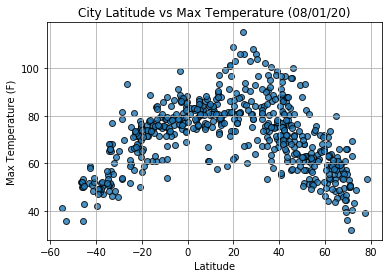

In [11]:
plt.scatter(lats, max_temp, edgecolor ="black", linewidth=1, marker ="o", alpha=0.8, label = "Cities" )
plt.title("City Latitude vs Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("output_data/Fig1.png")
plt.show()

The weather becomes warmer as one approaches the equator (0 Deg. Latitue)

## Latitude vs. Humidity Plot

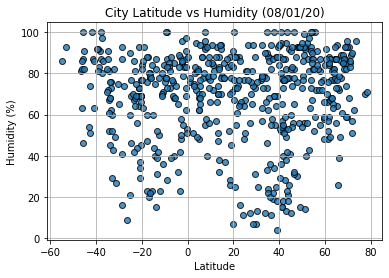

In [12]:
plt.scatter(lats, humidity, edgecolor ="black", linewidth=1, marker ="o", alpha=0.8, label = "Cities" )
plt.title("City Latitude vs Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("output_data/Fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

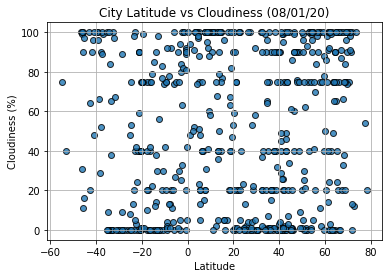

In [13]:
plt.scatter(lats, cloudiness, edgecolor ="black", linewidth=1, marker ="o", alpha=0.8, label = "Cities" )
plt.title("City Latitude vs Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("output_data/Fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

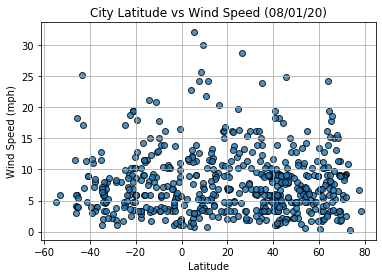

In [14]:
plt.scatter(lats, wind_speed, edgecolor ="black", linewidth=1, marker ="o", alpha=0.8, label = "Cities" )
plt.title("City Latitude vs Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("output_data/Fig4.png")
plt.show()

## Linear Regression

In [23]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize= 15, color = "red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()
    
    

In [24]:
# Create Northern and Southern Hemisphere DataFrames
north_hemi_df = cleaned_city_df.loc[(cleaned_city_df["Lat"]>=0)]
south_hemi_df = cleaned_city_df.loc[(cleaned_city_df["Lat"]<0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.6498883698696071


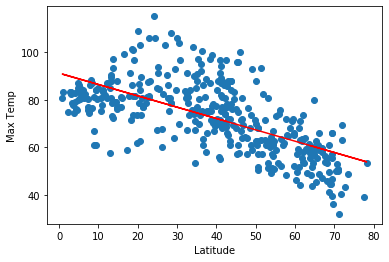

In [25]:
linear_regression_plot(north_hemi_df["Lat"], north_hemi_df["Max Temp"], "Max Temp", (6, 20))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8022145675720931


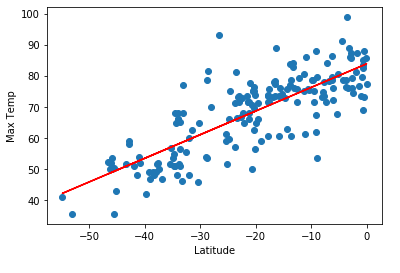

In [26]:
linear_regression_plot(south_hemi_df["Lat"], south_hemi_df["Max Temp"], "Max Temp", (-20, 20))

The high r value indicates a strong correlation between latitude and max temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06322265501949809


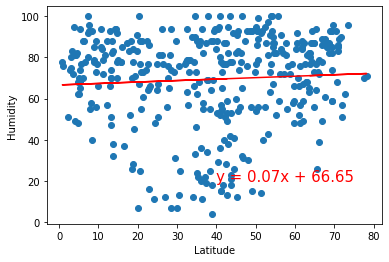

In [27]:
linear_regression_plot(north_hemi_df["Lat"], north_hemi_df["Humidity"], "Humidity", (40, 20))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.11583670936643971


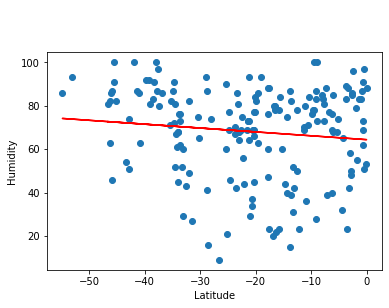

In [28]:
linear_regression_plot(south_hemi_df["Lat"], south_hemi_df["Humidity"], "Humidity", (-30, 120))

The low r values indicate a weak relationhip between humidity and latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04161380027101321


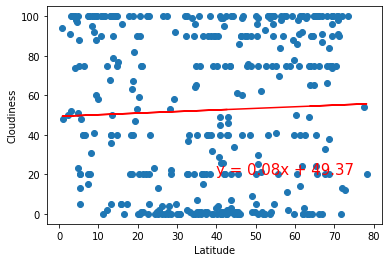

In [29]:
linear_regression_plot(north_hemi_df["Lat"], north_hemi_df["Cloudiness"], "Cloudiness", (40, 20))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.06877591431670335


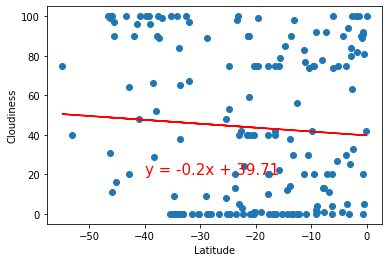

In [30]:
linear_regression_plot(south_hemi_df["Lat"], south_hemi_df["Cloudiness"], "Cloudiness", (-40, 20))

The low r values indicate a  weak relationship between latitude and cloudiness

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.10347432775535208


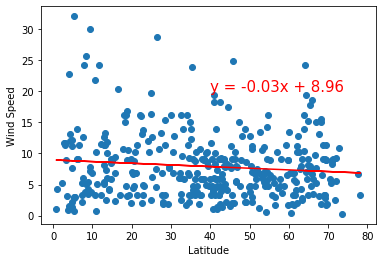

In [31]:
linear_regression_plot(north_hemi_df["Lat"], north_hemi_df["Wind Speed"], "Wind Speed", (40, 20))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.012005041762895756


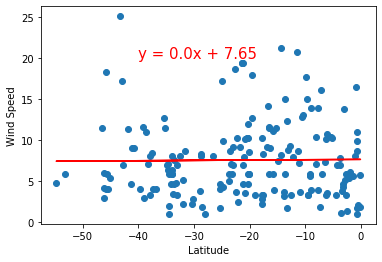

In [32]:
linear_regression_plot(south_hemi_df["Lat"], south_hemi_df["Wind Speed"], "Wind Speed", (-40, 20))

The low r values indicate that there is no relationship between wind speed and latitude. 